In [20]:
import cv2
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
from imutils import opencv2matplotlib
%matplotlib inline

In [21]:
def show(img, size=(6,6), gray=True):
    plt.figure(figsize=size)
    if gray:
        plt.imshow(img, 'gray')
    else:
        plt.imshow(opencv2matplotlib(img))
    plt.axis('off')
    plt.show()

def show_m(imgs, size=(16,16), gray=True):
    plt.figure(figsize=size)
    n_imgs = len(imgs)
    n = int(n_imgs ** .5)
    nn = int(np.ceil(n_imgs / n))
    for i, img in enumerate(imgs):
        plt.subplot(n, nn, i+1)
        gray = 'gray' if gray else None
        plt.imshow(img, gray)
        plt.axis('off')
        
def go3ch(gray):
    return np.repeat(np.expand_dims(gray, -1), 3, 2)

def mark(img, mask, color=(0,255,0)):
    out = img.copy()
    out[mask == 255] = color
    
    return out

def count_cells(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray,140,255,cv2.THRESH_BINARY_INV)
    mask = np.zeros(thresh.shape, dtype="uint8")
    labels = measure.label(thresh, neighbors=4, background=255)
    cells = []

    for label in np.unique(labels):
        if label == 0:
            continue

        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)

        if numPixels < 100:
            cells.append(labelMask)
            mask = cv2.add(mask, labelMask)

    return thresh, mask, cells

def count_all(img):
    out = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray,100,255,cv2.THRESH_BINARY_INV)
    mask = np.zeros(thresh.shape, dtype="uint8")
    labels = measure.label(thresh, neighbors=4, background=0)
    cells = []

    for label in np.unique(labels):
        if label == 0:
            continue

        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)

        if 10 < numPixels < 250:
            cells.append(labelMask)
            mask = cv2.add(mask, labelMask)

    return thresh, mask, cells

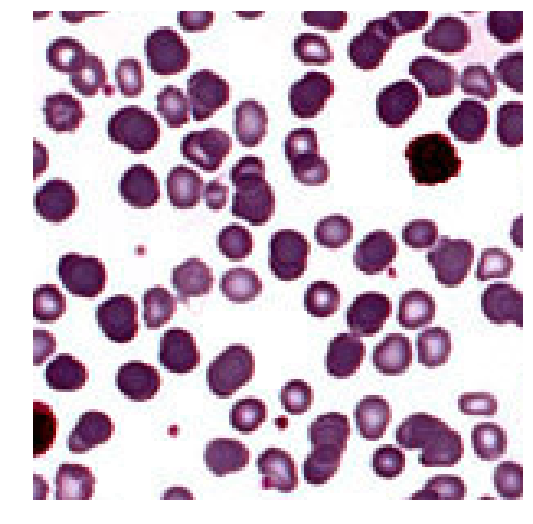

Leucocitos = 38


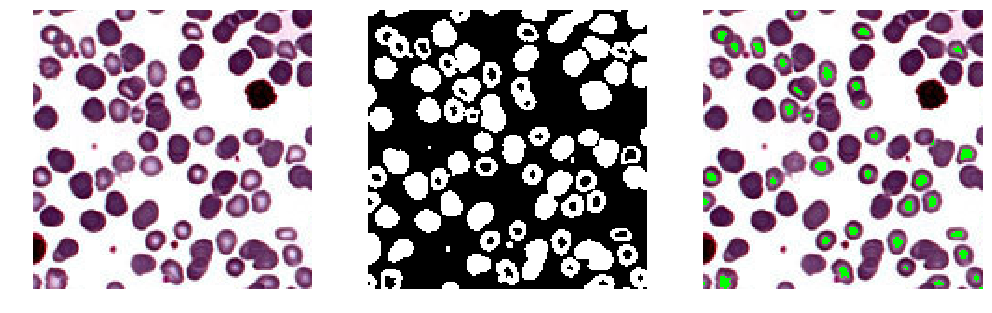

In [22]:
img = cv2.imread('data/Leucemia/pathology_cll20x01.jpg')
img = img[100:250,100:250]
show(img, (9,9))
thresh, mask, cells = count_cells(img)

print(f'Leucocitos = {len(cells)}')
show_m([img, thresh, mark(img, mask)], (17,12))

Total cells = 76


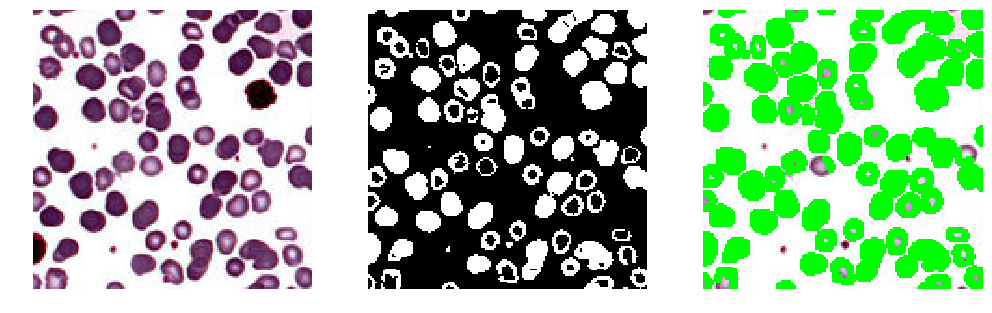

In [23]:
thresh, mask, cells = count_all(img)
kernel = np.ones((3,3),np.uint8)
mask = cv2.dilate(mask, kernel, iterations = 1)

print(f'Total cells = {len(cells)}')
show_m([img, thresh, mark(img, mask)], (17,12))